# 1 > data exploration
# 2 > data cleaning
# 3 > Exploratory Data Analysis (EDA) 

# data exploration

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Now let's take a look at the data
df = pd.read_csv('movies.csv')
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
df.shape

(7668, 15)

In [5]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


# data cleaning

In [6]:
#check for null values
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [7]:
# ok , lets fix those values

df['rating'].fillna(value='unknown' , inplace=True)
df.dropna(subset=['released'] , axis=0 ,inplace=True)
df['score'].fillna(value=df['score'].mean() , inplace=True)
df.dropna(subset=['votes'] , axis=0 , inplace=True)
df['writer'].fillna(value='unknown' , inplace=True)
df['star'].fillna(value='unknown' , inplace=True)
df.dropna(subset=['budget'] , axis=0 , inplace=True)
df['gross'].fillna(value=df['gross'].mean() , inplace=True)
df['company'].fillna(value='unknown' , inplace=True)
df['country'].fillna(value='unknown' , inplace=True)
df.dropna(subset=['runtime'] , axis=0 ,inplace=True)

In [8]:
df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [9]:
# Now let us check if our dataset has any duplicate values
df.drop_duplicates(keep='first',inplace=True)

<AxesSubplot:xlabel='gross'>

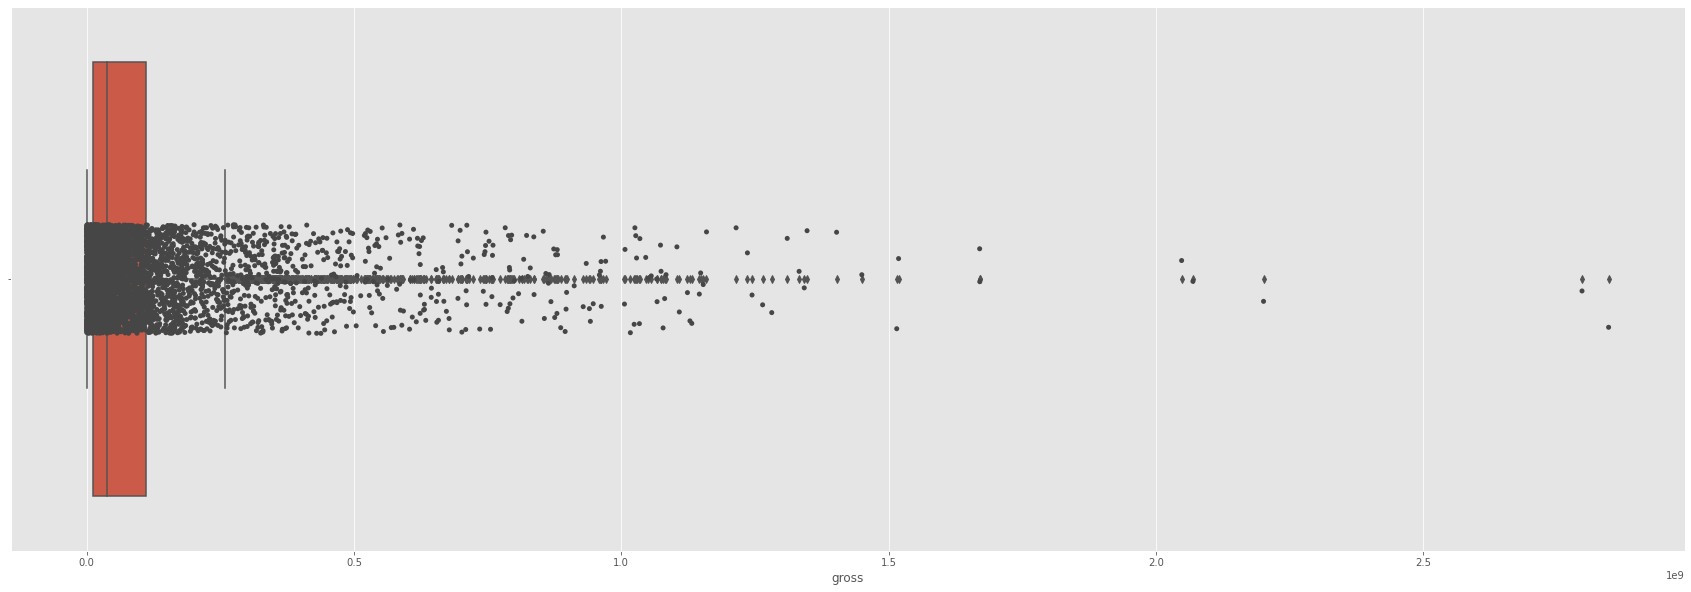

In [10]:
#detect and handle outliers
plt.figure(figsize=(30,10))

sns.boxplot(x='gross' , data=df)
sns.stripplot( x='gross',data=df, color="#474646")

In [11]:
# dropping values which is bigger than 2e9
outliers_indices = df.loc[df['gross']>2e9].index

In [12]:
df.drop(outliers_indices , inplace=True)

<AxesSubplot:xlabel='gross'>

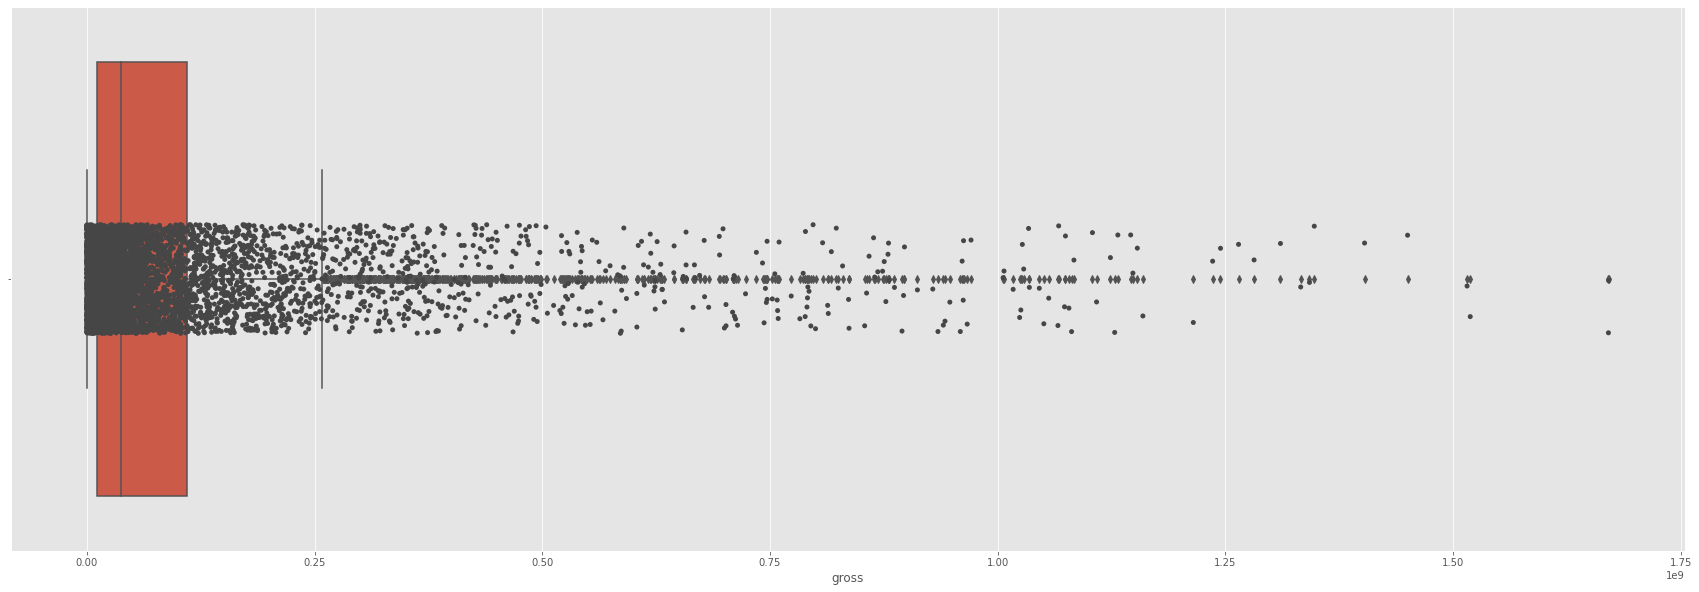

In [13]:
#check again 
plt.figure(figsize=(30,10))
sns.boxplot(x='gross' , data=df)
sns.stripplot( x='gross',data=df, color="#474646")

# Exploratory Data Analysis (EDA) & VISUALIZATION

In [15]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [24]:
# Top 10 highest-grossing movies
s=df[['name','gross']].sort_values(by='gross' , ascending=False).head(10)
s1 =s[:0]

,name,gross
7480,The Lion King,1.670728e+09
6653,Jurassic World,1.670516e+09
6043,The Avengers,1.518816e+09
6646,Furious 7,1.515341e+09
7494,Frozen II,1.450027e+09
6644,Avengers: Age of Ultron,1.402810e+09
7247,Black Panther,1.347598e+09
5845,Harry Potter and the Deathly Hallows: Part 2,1.342322e+09
7075,Star Wars: Episode VIII - The Last Jedi,1.332699e+09
7271,Jurassic World: Fallen Kingdom,1.310466e+09


<AxesSubplot:>

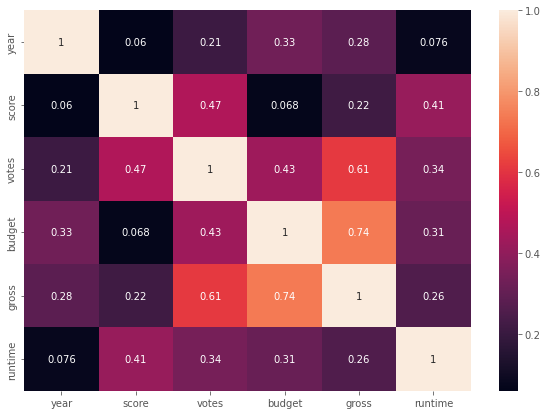

In [31]:
# Is there a correlation between the variables?
corr = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True )

#### It is clear that budget , gross and votes are correlated

In [36]:
# Which company made more profits
df[['company','gross']].sort_values(by='gross' , ascending=False).head(1)


,company,gross
7480,Walt Disney Pictures,1.670728e+09


In [45]:
# What kind of movies make the most money
print(df.groupby('genre').agg({'gross':'sum'}).sort_values( by='gross',ascending=False))


                  gross
genre                  
Action     2.289174e+11
Comedy     8.995688e+10
Animation  7.797765e+10
Drama      5.096351e+10
Adventure  4.378472e+10
Crime      2.054794e+10
Biography  1.940563e+10
Horror     1.529205e+10
Family     2.074333e+09
Mystery    2.004091e+09
Fantasy    1.650962e+09
Thriller   5.034259e+08
Sci-Fi     4.316695e+08
Romance    1.678769e+08
History    1.030045e+08
Western    2.002589e+07


In [47]:
# Top 10 producing countries
print(df.groupby('country').agg({'gross':'sum'}).sort_values( by='gross',ascending=False).head(10))

                       gross
country                     
United States   4.636487e+11
United Kingdom  4.561780e+10
France          6.568533e+09
China           6.305919e+09
New Zealand     6.278355e+09
Canada          5.940567e+09
Germany         5.688083e+09
Australia       2.800304e+09
Japan           2.606036e+09
Hong Kong       1.412808e+09


In [50]:
# How much did each type earn over the years 
print(pd.pivot_table(index='genre' , columns='year' ,values='gross', data = df ))

year               1980          1981          1982          1983  \
genre                                                               
Action     8.638114e+07  5.637323e+07  3.708966e+07  5.117390e+07   
Adventure  4.269948e+07  2.343198e+07  3.114493e+07  3.026127e+07   
Animation           NaN  8.323072e+07  1.056053e+07  3.956310e+05   
Biography  6.130163e+07  3.957276e+07  3.338394e+07  1.502953e+07   
Comedy     4.010087e+07  3.240613e+07  3.157331e+07  2.701420e+07   
Crime      2.789473e+07  8.917299e+06  6.069767e+06  2.530558e+07   
Drama      2.241386e+07  2.439415e+07  3.454871e+07  2.792306e+07   
Family              NaN           NaN  7.929106e+08           NaN   
Fantasy    2.276257e+07           NaN  7.000000e+06  8.400000e+06   
History             NaN           NaN           NaN  1.030045e+08   
Horror     5.473595e+07  2.862070e+07  3.067148e+07  2.168368e+07   
Mystery             NaN           NaN           NaN           NaN   
Romance             NaN           